In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### 데이터 불러오기 및 전처리

In [2]:
df = pd.read_excel('E:\\Python\\시도별 전출입 인구수.xlsx', engine='openpyxl', header=0)

In [3]:
df.head(3)

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,전출지별,전입지별,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,NaN,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937


In [4]:
# 누락 데이터(NaN)를 앞 행의 데이터 값으로 채우기
df = df.fillna(method='ffill')

In [5]:
# 서울에서 다른 지역으로 이동한 데이터만 추출하여 정리
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul.rename({'전입지별': '전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace = True)

In [6]:
# 서울에서 경기도로 이동한 인구 데이터 값만 선택
sr_one = df_seoul.loc['경기도']

### Lineplot 기본 사용법

C:\Users\User\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49436 (\N{HANGUL SYLLABLE SEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50872 (\N{HANGUL SYLLABLE UL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\lib\si

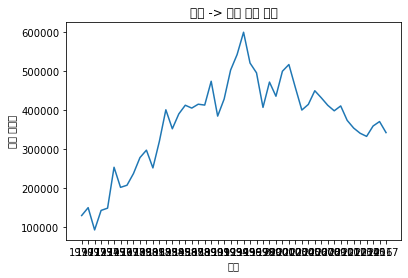

In [7]:
# X축, y축 데이터 plot 함수에 입력 / marker 추가(모양, 사이즈 지정)
plt.plot(sr_one.index, sr_one.values)

plt.title('서울 -> 경기 인구 이동') # 차트 제목
plt.xlabel('기간')                  # x축 이름
plt.ylabel('이동 인구수')           # y축 이름

plt.show()

### Matplotlib 한글 폰트 오류 해결

In [8]:
from matplotlib import font_manager, rc

In [9]:
font_path = "C:\\USERS\\USER\\APPDATA\\LOCAL\\MICROSOFT\\WINDOWS\\FONTS\\NANUMGOTHICCODING.ttf"

font_name = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family=font_name)

### 그래프 스타일 적용

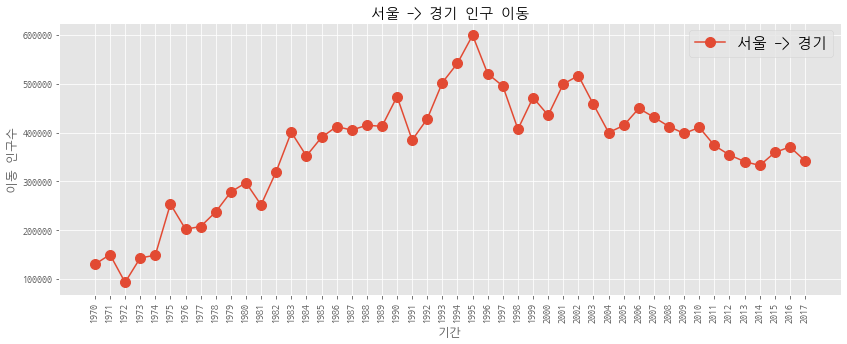

In [10]:
# 그래프 꾸미기
# 그래프 스타일 서식 지정
plt.style.use('ggplot')

# 그림 사이즈 지정 (가로 14인치, 세로 5인치)
plt.figure(figsize=(14, 5))

# x축 눈금 라벨 회전하기 rotation = 90도 같은 방식으로 작동함(반시계방향으로 90도 회전)
plt.xticks(rotation='vertical')


# X축, y축 데이터 plot 함수에 입력 / marker 추가(모양, 사이즈 지정)
plt.plot(sr_one.index, sr_one.values, marker='o', markersize=10)

plt.title('서울 -> 경기 인구 이동') # 차트 제목
plt.xlabel('기간')                  # x축 이름
plt.ylabel('이동 인구수')           # y축 이름

plt.legend(labels=['서울 -> 경기'], loc='best', fontsize=15) # 범례 표시

plt.show()

### 그래프에 주석 달기

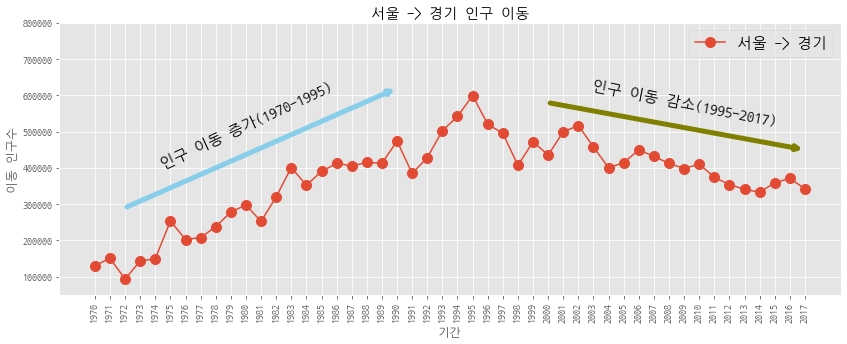

In [11]:
plt.style.use('ggplot')
plt.figure(figsize=(14, 5))
plt.xticks(rotation='vertical') 
plt.plot(sr_one.index, sr_one.values, marker='o', markersize=10)
plt.title('서울 -> 경기 인구 이동') 
plt.xlabel('기간')                  
plt.ylabel('이동 인구수')
plt.legend(labels=['서울 -> 경기'], loc='best', fontsize=15)

# y축 범위 지정(최소값, 최대값) 주석을 넣기 위해 y축의 범위를 더 넓혀줌
plt.ylim(50000, 800000)

# 주석 표시 - 화살표
plt.annotate('',
             xy = (20, 620000),                                         # 화살표의 머리 부분(끝점) x값은 인덱스 번호, y값은 해당 값 제시
             xytext = (2, 290000),                                      # 화살표의 꼬리 부분(시작점)
             xycoords = 'data',                                         # 좌표 체계
             arrowprops = dict(arrowstyle='->', color='skyblue', lw=5)  # 화살표 서식
            )
plt.annotate('',
             xy = (47, 450000),       
             xytext = (30, 580000),   
             xycoords = 'data',
             arrowprops = dict(arrowstyle='->', color='olive', lw=5) 
            )

# 주석 표시 - 텍스트
plt.annotate('인구 이동 증가(1970-1995)',                               # 텍스트 내용
             xy = (10, 400000),                                         # 텍스트 위치 기준점
             rotation = 25,                                             # 텍스트 회전 각도(반시계방향 기준)
             va = 'baseline',                                           # 텍스트 상하 정렬 center top bottom baseline
             ha = 'center',                                             # 텍스트 좌우 정렬 center left right
             fontsize = 15
            )
plt.annotate('인구 이동 감소(1995-2017)',                               
             xy = (39, 520000),                                       
             rotation = -11,                                              
             va = 'baseline',                                           
             ha = 'center',                                       
             fontsize = 15
            )
  

plt.show()

### 화면 분할하여 그래프 여러 개 그리기
---
axe 객체 활용

C:\Users\User\AppData\Local\Temp\ipykernel_17488\1599570428.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(sr_one.index, rotation=75)
C:\Users\User\AppData\Local\Temp\ipykernel_17488\1599570428.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(sr_one.index, rotation=75)


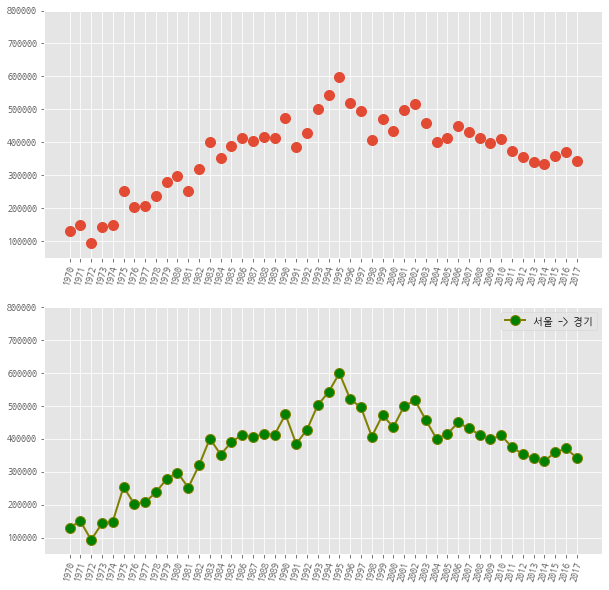

In [12]:
fig = plt.figure(figsize = (10, 10))
ax1 = fig.add_subplot(2, 1, 1)         # 2개의 서브 플롯 생성(행 크기, 열 크기, 서브플롯순서) fig그를 2X1로 분할함을 의미
ax2 = fig.add_subplot(2, 1, 2)

ax1.plot(sr_one, 'o', markersize=10)   # 선 그래프가 아니라 점 그래프로 표현
ax2.plot(sr_one, marker='o', markerfacecolor='green', markersize=10,
         color='olive', linewidth=2, label='서울 -> 경기')
ax2.legend(loc='best')

ax1.set_ylim(50000, 800000)
ax2.set_ylim(50000, 800000)

ax1.set_xticklabels(sr_one.index, rotation=75)
ax2.set_xticklabels(sr_one.index, rotation=75)

plt.show()

#### axe 객체 그래프 꾸미기

C:\Users\User\AppData\Local\Temp\ipykernel_17488\1673202913.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(sr_one.index, rotation = 75)


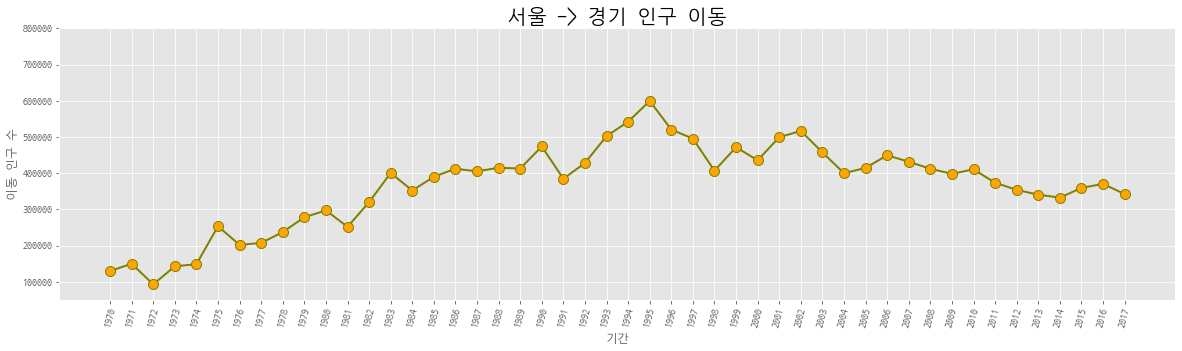

In [13]:
fig=plt.figure(figsize = (20, 5))
ax = fig.add_subplot(1, 1, 1)

ax.plot(sr_one, marker='o', markerfacecolor='orange', markersize = 10,
       color = 'olive', linewidth=2, label='서울 -> 경기')

ax.set_ylim(50000, 800000)
ax.set_title('서울 -> 경기 인구 이동', size = 20)
ax.set_xlabel('기간', size=12)
ax.set_ylabel('이동 인구 수', size=12)
ax.set_xticklabels(sr_one.index, rotation = 75)

# 축 눈금 라벨 크기
ax.tick_params(axis = "x", labelsize = 10)
ax.tick_params(axis = "y", labelsize = 10)

plt.show()

### 동일 객체에 그래프 여러 개 그리기
---
axe 객체 활용

In [14]:
col_years = list(map(str, range(1970, 2018)))
df3 = df_seoul.loc[['충청남도', '경상북도', '강원도'], col_years]

C:\Users\User\AppData\Local\Temp\ipykernel_17488\2631543595.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(col_years, rotation=90)


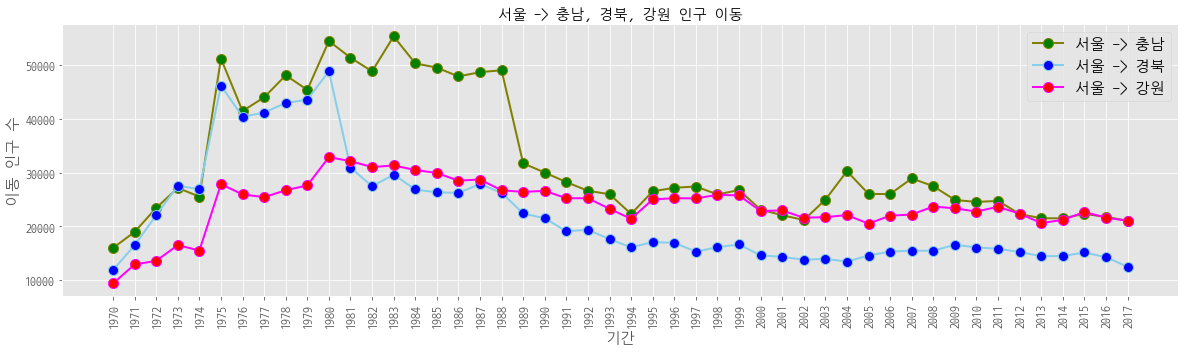

In [15]:
plt.style.use('ggplot')

fig = plt.figure(figsize = (20, 5))
ax = fig.add_subplot(1, 1, 1)

ax.plot(col_years, df3.loc['충청남도',:], marker='o', markerfacecolor='green', markersize = 10,
       color = 'olive', linewidth=2, label='서울 -> 충남')
ax.plot(col_years, df3.loc['경상북도',:], marker='o', markerfacecolor='blue', markersize = 10,
       color = 'skyblue', linewidth=2, label='서울 -> 경북')
ax.plot(col_years, df3.loc['강원도',:], marker='o', markerfacecolor='red', markersize = 10,
       color = 'magenta', linewidth=2, label='서울 -> 강원')

ax.legend(loc = 'best', fontsize = 15)

ax.set_title('서울 -> 충남, 경북, 강원 인구 이동')
ax.set_xlabel('기간', size = 15)
ax.set_ylabel('이동 인구 수', size=15)

ax.set_xticklabels(col_years, rotation=90)
ax.tick_params(axis='x', labelsize = 12)
ax.tick_params(axis='y', labelsize = 12)

plt.show()